In [87]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

# Information Gathering
Gathering relevant data and storing

In [59]:
index_constituents = pd.read_csv(r"ind_niftymidsmallfinancailservice_list.csv")

In [60]:
index_constituents["Symbol"] = index_constituents["Symbol"] + ".NS"

In [61]:
stock_df = index_df = returns_df = pd.DataFrame()

In [62]:
for ticker in index_constituents["Symbol"]:
    stock_info = yf.download(ticker, start="2018-03-01", end="2023-03-01", interval="1mo")
    stock_df[ticker] = stock_info["Close"] 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Calculating returns, mean returns and covariance

In [63]:

stock_df["Market"] = yf.download("^NSEI", start="2018-03-01", end="2023-03-01", interval="1mo")["Close"]

[*********************100%***********************]  1 of 1 completed


In [64]:
returns_df = stock_df.pct_change(1)
metrics_df = pd.DataFrame(returns_df.mean()*12, index = returns_df.columns.transpose(), columns=["Avg Returns"])
metrics_df["Cumm. Returns"] = returns_df.sum()

In [65]:
cov_matrix = returns_df.cov(ddof = 1)*12

In [66]:
import math

In [67]:
for i in metrics_df.index:
    metrics_df.loc[i,"Variance"] = cov_matrix[i].loc[i]
    metrics_df.loc[i,"Std. Dev."] = math.sqrt(metrics_df["Variance"].loc[i])

In [68]:
metrics_df.tail()

,Avg Returns,Cumm. Returns,Variance,Std. Dev.
RECLTD.NS,0.102924,0.506043,0.124590,0.352973
SHRIRAMFIN.NS,0.073330,0.360541,0.218289,0.467215
SUNDARMFIN.NS,0.137869,0.677858,0.167054,0.408723
YESBANK.NS,-0.318005,-1.563526,0.466668,0.683131
Market,0.128711,0.632827,0.037158,0.192763


In [69]:
cov_matrix

,AUBANK.NS,AAVAS.NS,ABCAPITAL.NS,BSE.NS,CRISIL.NS,CANFINHOME.NS,CANBK.NS,CDSL.NS,CHOLAHLDNG.NS,CUB.NS,...,MCX.NS,NAM-INDIA.NS,POLICYBZR.NS,PFC.NS,RBLBANK.NS,RECLTD.NS,SHRIRAMFIN.NS,SUNDARMFIN.NS,YESBANK.NS,Market
AUBANK.NS,0.268661,0.123295,0.144905,0.016881,0.049444,0.135534,0.111081,0.084061,0.124865,0.071242,...,0.038739,0.077622,0.000665,0.066872,0.156882,0.072380,0.123850,0.079589,0.033025,0.054905
AAVAS.NS,0.123295,0.144210,0.120707,0.015105,0.039053,0.099883,0.094800,0.031795,0.099049,0.057612,...,-0.006521,0.068850,-0.027470,0.063550,0.127667,0.058059,0.094552,0.086394,0.038556,0.041077
ABCAPITAL.NS,0.144905,0.120707,0.295014,0.024906,0.048926,0.109964,0.140402,0.070081,0.145766,0.081111,...,0.009511,0.096128,0.059124,0.104714,0.189017,0.096462,0.130517,0.147978,0.140952,0.066248
BSE.NS,0.016881,0.015105,0.024906,1.144071,0.065233,0.001625,0.012235,0.107609,0.001847,0.032879,...,0.029941,0.008243,0.066673,0.017214,0.056333,0.054666,-0.007249,0.012570,0.076235,0.053956
CRISIL.NS,0.049444,0.039053,0.048926,0.065233,0.096203,0.009169,0.016486,0.019903,0.036186,0.017844,...,-0.008766,0.015047,0.054179,0.016163,0.052405,0.020267,0.030647,0.021812,0.016103,0.021017
CANFINHOME.NS,0.135534,0.099883,0.109964,0.001625,0.009169,0.230805,0.113962,0.064038,0.081638,0.072817,...,0.052468,0.101588,-0.035783,0.077381,0.112749,0.085841,0.102310,0.043986,0.083587,0.050621
CANBK.NS,0.111081,0.094800,0.140402,0.012235,0.016486,0.113962,0.230467,0.057892,0.094124,0.088043,...,0.058162,0.080199,-0.072128,0.113189,0.183923,0.121406,0.104704,0.078055,0.155301,0.059312
CDSL.NS,0.084061,0.031795,0.070081,0.107609,0.019903,0.064038,0.057892,0.150372,0.057937,0.029720,...,0.052015,0.051637,0.026852,0.027989,0.063474,0.032112,0.023432,0.044325,0.034083,0.030333
CHOLAHLDNG.NS,0.124865,0.099049,0.145766,0.001847,0.036186,0.081638,0.094124,0.057937,0.163470,0.079293,...,0.012322,0.057487,-0.021665,0.067315,0.137553,0.059061,0.120683,0.093774,0.042144,0.052628
CUB.NS,0.071242,0.057612,0.081111,0.032879,0.017844,0.072817,0.088043,0.029720,0.079293,0.120310,...,0.033131,0.040966,-0.047138,0.056327,0.108971,0.058225,0.089822,0.052450,0.069123,0.046871


# Calculating Beta

formula = Cov (a,m) / Var (m)

In [70]:
market_variance = metrics_df["Variance"].loc["Market"]
metrics_df["Beta"]  = cov_matrix["Market"]/market_variance
metrics_df["Beta"].tail() 

RECLTD.NS        0.989425
SHRIRAMFIN.NS    1.457278
SUNDARMFIN.NS    0.928135
YESBANK.NS       1.268228
Market           1.000000
Name: Beta, dtype: float64

# Calculating Residual Variance
res_var = Variance(i) - Beta^2 x Variance(m)

In [71]:
for i in metrics_df.index:
    metrics_df.loc[i,"Residual Variance"] = metrics_df.loc[i,"Variance"] - (math.pow(metrics_df.loc[i,"Beta"],2)*market_variance)
metrics_df.tail()

,Avg Returns,Cumm. Returns,Variance,Std. Dev.,Beta,Residual Variance
RECLTD.NS,0.102924,0.506043,0.124590,0.352973,0.989425,0.088214
SHRIRAMFIN.NS,0.073330,0.360541,0.218289,0.467215,1.457278,0.139380
SUNDARMFIN.NS,0.137869,0.677858,0.167054,0.408723,0.928135,0.135046
YESBANK.NS,-0.318005,-1.563526,0.466668,0.683131,1.268228,0.406904
Market,0.128711,0.632827,0.037158,0.192763,1.000000,0.000000


# Sharpe Model

1. Calculate excess return to Beta
2. Make Ranked table
3. Determine Ci
4. Determine Zi
5. Determine Weights and weighted returns

### Step 1

In [72]:
#excess return to beta
ret_beta_df = pd.DataFrame()

In [73]:
rate_f = 0.0687

In [74]:
ret_beta_df["Ri"] = metrics_df["Avg Returns"]
ret_beta_df["Beta"] = metrics_df["Beta"]
ret_beta_df["Ri - Rf"] = ret_beta_df["Ri"] - rate_f
ret_beta_df["Excess ret to beta"] = ret_beta_df["Ri - Rf"] / ret_beta_df["Beta"]

In [75]:
ret_beta_df["Residual Variance"] = metrics_df["Residual Variance"]
ret_beta_df.drop("Market",inplace = True)
ret_beta_df

,Ri,Beta,Ri - Rf,Excess ret to beta,Residual Variance
AUBANK.NS,0.281437,1.477622,0.212737,0.143972,0.187533
AAVAS.NS,0.278161,1.105471,0.209461,0.189477,0.098801
ABCAPITAL.NS,0.141536,1.782890,0.072836,0.040853,0.176902
BSE.NS,0.500483,1.452078,0.431783,0.297355,1.065723
CRISIL.NS,0.165663,0.565622,0.096963,0.171427,0.084315
CANFINHOME.NS,0.153203,1.362345,0.084503,0.062028,0.161842
CANBK.NS,0.127546,1.596230,0.058846,0.036866,0.135792
CDSL.NS,0.326289,0.816347,0.257589,0.315539,0.125609
CHOLAHLDNG.NS,0.058451,1.416353,-0.010249,-0.007236,0.088930
CUB.NS,0.038807,1.261422,-0.029893,-0.023698,0.061185


## Step 2

In [76]:
ranked_df = ret_beta_df.sort_values("Excess ret to beta", ascending=False)


## Step 3

In [77]:
ranked_df["C* numerator"] = ranked_df["Ri - Rf"]*ranked_df["Beta"]/ranked_df["Residual Variance"]
ranked_df['Cumm. numerator'] = ranked_df['C* numerator'].cumsum()
ranked_df['C* denominator'] = np.power(ranked_df['Beta'],2)/ranked_df['Residual Variance']
ranked_df['Cumm. denominator'] = ranked_df['C* denominator'].cumsum()
ranked_df['Ci'] = (market_variance * ranked_df['Cumm. numerator'])/(1 + (market_variance*ranked_df['Cumm. denominator']))

## Getting value of C*

In [78]:
c_star_index = ranked_df['Ci'].argmax()
c_star_score = ranked_df["Ci"].iloc[c_star_index]
c_star_name = ranked_df.index[c_star_index]
#C* was found at index = 8 and values are as below
print("C* Stock name:")
print(c_star_name)
print("C* score:")
print(c_star_score)

C* Stock name:
AUBANK.NS
C* score:
0.1360575402162822


In [79]:
print("The portfolio will consist of the following stocks:")
ranked_df.index[0:c_star_index]

The portfolio will consist of the following stocks:


Index(['POLICYBZR.NS', 'CAMS.NS', 'CDSL.NS', 'BSE.NS', 'MCX.NS', 'IEX.NS',
       'AAVAS.NS', 'CRISIL.NS'],
      dtype='object')

## Creating new dataframe for weights and weighted portfolio returns

In [80]:
sharpe_df = pd.DataFrame()

In [81]:
sharpe_df = ranked_df[["Ri",'Excess ret to beta',"Beta","Residual Variance"]]
sharpe_df = sharpe_df.loc[:c_star_name]
sharpe_df["Zi"] = (sharpe_df["Beta"]/sharpe_df["Residual Variance"])*(sharpe_df["Excess ret to beta"] - c_star_score)
sharpe_df["Wi"] = sharpe_df["Zi"]/sharpe_df["Zi"].sum()
sharpe_df["RiWi"] = sharpe_df["Ri"]*sharpe_df["Wi"]
print("The total sum of weights of portfolio is " + str(sharpe_df["Wi"].sum()))

The total sum of weights of portfolio is 0.9999999999999999


In [82]:
sharpe_df

,Ri,Excess ret to beta,Beta,Residual Variance,Zi,Wi,RiWi
POLICYBZR.NS,-0.337348,4.997826,-0.081245,0.245017,-1.612110,-0.519973,0.175412
CAMS.NS,0.266560,0.678162,0.291759,0.139307,1.135362,0.366202,0.097615
CDSL.NS,0.326289,0.315539,0.816347,0.125609,1.166469,0.376235,0.122762
BSE.NS,0.500483,0.297355,1.452078,1.065723,0.219773,0.070886,0.035477
MCX.NS,0.211970,0.234867,0.610005,0.116168,0.518850,0.167351,0.035473
IEX.NS,0.262019,0.206727,0.935144,0.085306,0.774689,0.249870,0.065471
AAVAS.NS,0.278161,0.189477,1.105471,0.098801,0.597703,0.192784,0.053625
CRISIL.NS,0.165663,0.171427,0.565622,0.084315,0.237272,0.076530,0.012678
AUBANK.NS,0.281437,0.143972,1.477622,0.187533,0.062362,0.020115,0.005661


In [83]:
sharpe_df["Wi"].sum()

0.9999999999999999

# CAPM
Ri = Rf + Bi (Rm - Rf)

In [84]:
capm_df = pd.DataFrame()
capm_df["Beta"] = metrics_df["Beta"]
capm_df["Estimated Returns"] = metrics_df["Avg Returns"]
capm_df.drop("Market",inplace = True)
market_avg_ret = metrics_df["Avg Returns"].loc["Market"]
market_avg_ret

0.12871066289715227

## Calculating Ri

In [85]:
capm_df["Expected Return"] = rate_f + capm_df["Beta"]*(market_avg_ret - rate_f)
for i in capm_df.index:
    if capm_df.loc[i,"Estimated Returns"] > capm_df.loc[i,"Expected Return"]:
        capm_df.loc[i, "Remarks"] = "Undervalued"
    elif capm_df.loc[i,"Estimated Returns"] < capm_df.loc[i,"Expected Return"]:
        capm_df.loc[i, "Remarks"] = "Overvalued"
    else:
        capm_df.loc[i, "Remarks"] = "Correctly Valued"
capm_df

,Beta,Estimated Returns,Expected Return,Remarks
AUBANK.NS,1.477622,0.281437,0.157373,Undervalued
AAVAS.NS,1.105471,0.278161,0.135040,Undervalued
ABCAPITAL.NS,1.782890,0.141536,0.175692,Overvalued
BSE.NS,1.452078,0.500483,0.155840,Undervalued
CRISIL.NS,0.565622,0.165663,0.102643,Undervalued
CANFINHOME.NS,1.362345,0.153203,0.150455,Undervalued
CANBK.NS,1.596230,0.127546,0.164491,Overvalued
CDSL.NS,0.816347,0.326289,0.117690,Undervalued
CHOLAHLDNG.NS,1.416353,0.058451,0.153696,Overvalued
CUB.NS,1.261422,0.038807,0.144399,Overvalued


## Making portfolio of undervalued stocks

In [86]:
capm_portfolio_df = capm_df[capm_df["Remarks"] == 'Undervalued']

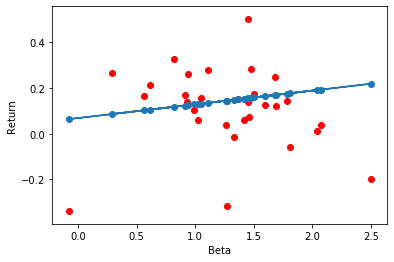

In [101]:

plt.scatter(capm_df["Beta"],capm_df["Estimated Returns"],color="r")

plt.xlabel('Beta')
plt.ylabel('Return')

plt.plot(capm_df["Beta"], capm_df["Expected Return"],marker='o')

# Markowitz Model
1. Calculate Log returns = log(current/prev)
2. Annualise log returns
3. Get volatility functions
4. Minimize risk maximize returns
5. Monte carlo
6. Plotting Frontier